In [1]:
%matplotlib inline

# Check the versions of libraries
import sys
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from pandas.tools.plotting import scatter_matrix
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# CSS File
from IPython.core.display import HTML
from IPython.display import Image

# Style Setting
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")
sns.set_style("darkgrid")

# Notebook Style Setting
css = open('styles/style-table.css').read() + open('styles/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

print(dataset.shape)
print(dataset.describe())
dataset.head()

(150, 5)
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


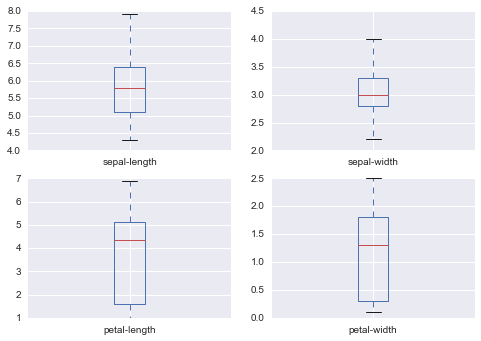

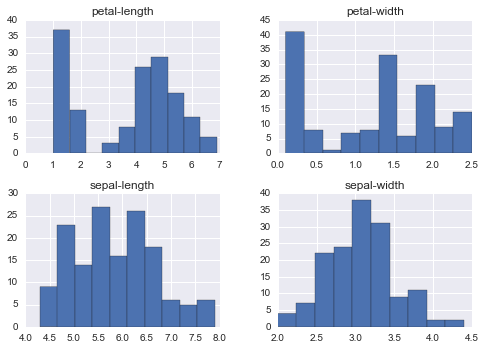

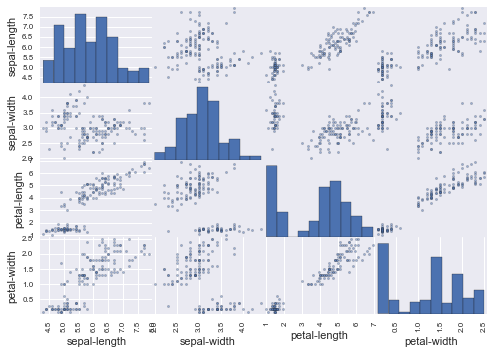

In [3]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histograms
dataset.hist()
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [4]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, 
                                                                                 test_size=validation_size, 
                                                                                 random_state=seed)

In [5]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [6]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


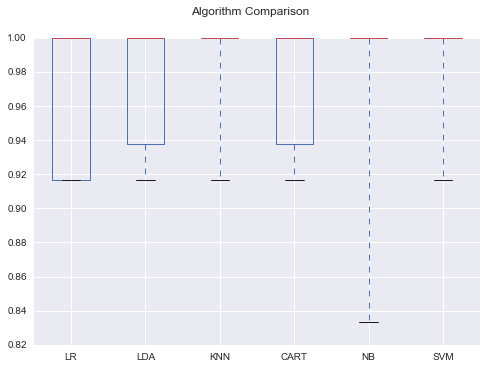

In [7]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [8]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print("\n SVM accuracy:{0}".format(accuracy_score(Y_validation, predictions)))
print("\n SVM confusion_matrix:\n{}".format(confusion_matrix(Y_validation, predictions)))
print("\n SVM classification_report:\n{}".format(classification_report(Y_validation, predictions)))



 SVM accuracy:0.933333333333

 SVM confusion_matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]

 SVM classification_report:
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
Iris-virginica       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30



In [9]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("\n KNN accuracy:{0}".format(accuracy_score(Y_validation, predictions)))
print("\n KNN confusion_matrix:\n{}".format(confusion_matrix(Y_validation, predictions)))
print("\n KNN classification_report:\n{}".format(classification_report(Y_validation, predictions)))



 KNN accuracy:0.9

 KNN confusion_matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

 KNN classification_report:
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



In [10]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print("\n LDA accuracy:{0}".format(accuracy_score(Y_validation, predictions)))
print("\n LDA confusion_matrix:\n{}".format(confusion_matrix(Y_validation, predictions)))
print("\n LDA classification_report:\n{}".format(classification_report(Y_validation, predictions)))



 LDA accuracy:0.966666666667

 LDA confusion_matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]

 LDA classification_report:
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
Iris-virginica       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30

